# THREE FUNCTIONS FOR CLEANING BASELINE PUPIL MEASURE

## 1. Function for a dataframe of blink start/end times

## 2. Function for a histogram of total blink number for all participants

## 3. Function for distribution of blinks for one participant's baseline pupil measure

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#ADD BADSTRING FILES YOU ARE CLEANING TO THIS LIST
files_list = ['4J0VS0_baseline_badstring.csv', '7DL514_baseline_badstring.csv', '7T9M4M_baseline_badstring.csv', '8OX7U6_baseline_badstring.csv', '9W0DJC_baseline_badstring.csv', '29XXOO_baseline_badstring.csv', '34BRN8_baseline_badstring.csv', '42I6EI_baseline_badstring.csv', '80MSTS_baseline_badstring.csv', '264COY_baseline_badstring.csv', 'A98DB9_baseline_badstring.csv', 'AJA1KZ_baseline_badstring.csv', 'BZR5YS_baseline_badstring.csv', 'CCV1AT_baseline_badstring.csv', 'CM1TZG_baseline_badstring.csv', 'CWYKY2_baseline_badstring.csv', 'DA2GA3_baseline_badstring.csv', 'DK88ZQ_baseline_badstring.csv', 'DU5ZOC_baseline_badstring.csv', 'EPSUO5_baseline_badstring.csv', 'ESCFOV_baseline_badstring.csv', 'FDT8PT_baseline_badstring.csv', 'FNZ0EF_baseline_badstring.csv', 'GB0NP3_baseline_badstring.csv', 'HGK949_baseline_badstring.csv', 'N0WPBH_baseline_badstring.csv', 'NQ0XLV_baseline_badstring.csv', 'OVJJA1_baseline_badstring.csv', 'QO4J04_baseline_badstring.csv', 'QZ1BQR_baseline_badstring.csv', 'RW8QQ1_baseline_badstring.csv', 'SAIERP_baseline_badstring.csv', 'U33EHJ_baseline_badstring.csv', 'UP2Q6V_baseline_badstring.csv', 'UWQ7RD_baseline_badstring.csv', 'WZH973_baseline_badstring.csv', 'YB70MS_baseline_badstring.csv', 'YI5H7A_baseline_badstring.csv', 'YUVTXN_baseline_badstring.csv']

#ADD RAW DATA FILES YOU ARE CLEANING TO THIS LIST
raw_list = ['4J0VS0_baseline_pupil_RAW.csv', '7DL514_baseline_pupil_RAW.csv', '7T9M4M_baseline_pupil_RAW.csv', '8OX7U6_baseline_pupil_RAW.csv', '9W0DJC_baseline_pupil_RAW.csv', '29XXOO_baseline_pupil_RAW.csv', '34BRN8_baseline_pupil_RAW.csv', '42I6EI_baseline_pupil_RAW.csv', '80MSTS_baseline_pupil_RAW.csv', '264COY_baseline_pupil_RAW.csv', 'A98DB9_baseline_pupil_RAW.csv', 'AJA1KZ_baseline_pupil_RAW.csv', 'BZR5YS_baseline_pupil_RAW.csv', 'CCV1AT_baseline_pupil_RAW.csv', 'CM1TZG_baseline_pupil_RAW.csv', 'CWYKY2_baseline_pupil_RAW.csv', 'DA2GA3_baseline_pupil_RAW.csv', 'DK88ZQ_baseline_pupil_RAW.csv', 'DU5ZOC_baseline_pupil_RAW.csv', 'EPSUO5_baseline_pupil_RAW.csv', 'ESCFOV_baseline_pupil_RAW.csv', 'FDT8PT_baseline_pupil_RAW.csv', 'FNZ0EF_baseline_pupil_RAW.csv', 'GB0NP3_baseline_pupil_RAW.csv', 'HGK949_baseline_pupil_RAW.csv', 'N0WPBH_baseline_pupil_RAW.csv', 'NQ0XLV_baseline_pupil_RAW.csv', 'OVJJA1_baseline_pupil_RAW.csv', 'QO4J04_baseline_pupil_RAW.csv', 'QZ1BQR_baseline_pupil_RAW.csv', 'RW8QQ1_baseline_pupil_RAW.csv', 'SAIERP_baseline_pupil_RAW.csv', 'U33EHJ_baseline_pupil_RAW.csv', 'UP2Q6V_baseline_pupil_RAW.csv', 'UWQ7RD_baseline_pupil_RAW.csv', 'WZH973_baseline_pupil_RAW.csv', 'YB70MS_baseline_pupil_RAW.csv', 'YI5H7A_baseline_pupil_RAW.csv', 'YUVTXN_baseline_pupil_RAW.csv'] 

In [3]:
#FUNCTION 1

def cleaning_baseline_function(files_list, raw_list, time_column): 

  #DEFINE LISTS TO APPEND TO LATER
  blink_start_time = []
  blink_end_time = []
  blink_number = []
  subjectID = [] 
  total_number_of_blinks = []

  #FOR LOOP FOR READING IN ONE SUBJECT'S DATA AS A DATAFRAME
  for i in range(len(files_list)):

    df = pd.read_csv('/Users/emilydial/Library/Mobile Documents/com~apple~CloudDocs/Harvard/Phelps Lab/Baseline Pupil Data/' + files_list[i])
    df_raw = pd.read_csv('/Users/emilydial/Library/Mobile Documents/com~apple~CloudDocs/Harvard/Phelps Lab/Baseline Pupil Data/' + raw_list[i]) 

    #MAKE A LIST THAT IS THE SAME LENGTH AS THE LISTS OF BLINKS FOR EACH PARTICIPANT
    length_of_list = []
    
    #MAKE A SUBSET ONLY WITH ROWS THAT REFER TO BLINK
    blink_dataframe = df[df['0'].str.contains('BLINK')]

    #FOR LOOP TO SEPARATE ELEMENTS IN EACH ROW
    for n in range(len(blink_dataframe)):

      list_of_elements = blink_dataframe['0'].iloc[n].split()  
      
      if list_of_elements[0] == 'EBLINK':
        
        if int(list_of_elements[2]) < (df_raw[time_column].iloc[0] + 300000) and int(list_of_elements[3]) < (df_raw[time_column].iloc[0] + 300000):
          blink_start_time.append(list_of_elements[2])
          blink_end_time.append(list_of_elements[3])
          length_of_list.append(0)
            
    for k in range(len(length_of_list)): 
      blink_number.append(k + 1)
      subjectID.append(files_list[i][0:6])
      total_number_of_blinks.append(len(length_of_list)) 

  data = {'SubjectID': subjectID, 'Blink_Number': blink_number, 'Blink_Start_Time': blink_start_time, 'Blink_End_Time': blink_end_time, 'Total_Number_of_Blinks': total_number_of_blinks}

  cleaned_blink_dataframe = pd.DataFrame(data)
  cleaned_blink_dataframe['Blink_Start_Time'] = cleaned_blink_dataframe['Blink_Start_Time'].astype(float)
  cleaned_blink_dataframe['Blink_End_Time'] = cleaned_blink_dataframe['Blink_End_Time'].astype(float) 

  return(cleaned_blink_dataframe) 
  

                                               
                                                 

      

    






In [4]:
cleaned_blink_data = cleaning_baseline_function(files_list, raw_list, 'time')

cleaned_blink_data


,SubjectID,Blink_Number,Blink_Start_Time,Blink_End_Time,Total_Number_of_Blinks
0,4J0VS0,1,832697.0,832820.0,115
1,4J0VS0,2,839349.0,839441.0,115
2,4J0VS0,3,845671.0,845759.0,115
3,4J0VS0,4,848567.0,848659.0,115
4,4J0VS0,5,851223.0,851363.0,115
...,...,...,...,...,...
2287,YUVTXN,11,1069270.0,1069271.0,15
2288,YUVTXN,12,1071958.0,1072160.0,15
2289,YUVTXN,13,1091206.0,1091485.0,15
2290,YUVTXN,14,1122234.0,1122523.0,15


In [28]:
cleaned_blink_data.to_csv('CleanedBlinkData.csv', index=False)

In [5]:
#FUNCTION 2

def total_blink_distribution(blink_df_name, subjectID_column, total_blink_column):
    
    #READ IN BLINK DATAFRAME
    blink_df = pd.read_csv('/Users/emilydial/Library/Mobile Documents/com~apple~CloudDocs/Harvard/Phelps Lab/Cleaned Baseline Pupil Data/' + blink_df_name)
    
    #MAKE A LIST OF ALL UNIQUE SUBJECT IDs
    subjectID = blink_df[subjectID_column]
    subjectID = np.unique(subjectID) 
    subjectID = list(subjectID)
    
    #INITIALIZE A LIST FOR EACH SUBJECT'S TOTAL NUMBER OF BLINKS
    total_blink_number = [] 
    
    #CREATE A FILTER FOR EACH SUBJECT
    for i in subjectID:
        
        filt = (blink_df[subjectID_column] == i)
        subjectID_subset = blink_df[filt]
        
        #APPEND THE TOTAL NUMBER OF BLINKS TO THE LIST
        total_number_of_blinks = subjectID_subset[total_blink_column].iloc[0] 
        total_blink_number.append(total_number_of_blinks)
        
    #CREATE A HISTOGRAM
    blink_histogram = plt.hist(total_blink_number, bins=40)
    plt.ylabel('Frequency')
    plt.xlabel('Total Number of Blinks for Participant')
    plt.title('Distribution of Total Number of Blinks during Baseline')
    plt.show()
    plt.savefig('Total_Number_of_Blinks_Histogram') 
    
    return blink_histogram
        
        
        
        
        

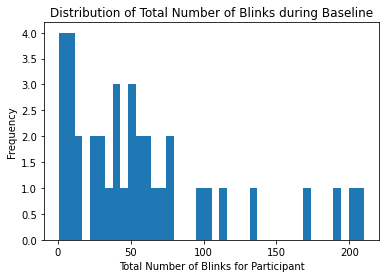

<Figure size 432x288 with 0 Axes>

In [6]:
total_blink_histogram = total_blink_distribution('AllCleanedBlinkData.csv', 'SubjectID', 'Total_Number_of_Blinks')

In [85]:
#FUNCTION 3

def blink_time_plot(raw_list, blink_df_name, blink_subject_column, start_time_column, end_time_column, raw_time_column):
    
    #READ IN RAW AND BLINK DATAFRAMES:
    
    blink_df = pd.read_csv('/Users/emilydial/Library/Mobile Documents/com~apple~CloudDocs/Harvard/Phelps Lab/Cleaned Baseline Pupil Data/' + blink_df_name)
    
    for i in range(len(files_list)):
    
      raw_df = pd.read_csv('/Users/emilydial/Library/Mobile Documents/com~apple~CloudDocs/Harvard/Phelps Lab/Baseline Pupil Data/' + raw_list[i])
    
      #MAKE A FILTER FOR THE SUBJECT OF INTEREST
      
      subject_of_interest = raw_list[i][0:6] 
        
      filt = (blink_df[blink_subject_column] == subject_of_interest)
      subject_subset = blink_df[filt] 
    
      #INITIALIZE A LIST FOR THE AVERAGE TIME OF EACH BLINK
      blink_average_time = []
    
      #FOR LOOP TO CALCULATE THE AVERAGE TIME OF EACH BLINK
      for n in range(len(subject_subset)):
        
        start_time = subject_subset[start_time_column].iloc[n]
        end_time = subject_subset[end_time_column].iloc[n]
        average_time = (start_time + end_time) // 2 
        
        blink_average_time.append(average_time)
        
      #CREATE THE PLOT
      initial_time = raw_df[raw_time_column].iloc[0]
      end_time = initial_time + 300000 
    
      y = []
      for m in range(len(blink_average_time)):
        y.append(0)
        
      plt.figure(figsize=(20,5))
    
      blink_time_plot = plt.scatter(blink_average_time, y, marker='|')

      ax=plt.gca()
    
      ax.get_yaxis().set_visible(False)
      plt.xlabel('Time Step')
      plt.title(raw_list[i][0:6] + ' Blink_Distribution')
      plt.xlim([initial_time, end_time]) 
    
    
    
    
    return blink_time_plot
    
        
        

    
    
    

/var/folders/67/1q1s53995qg3ml8dw6gm3nz80000gn/T/ipykernel_27347/1087403646.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,5))


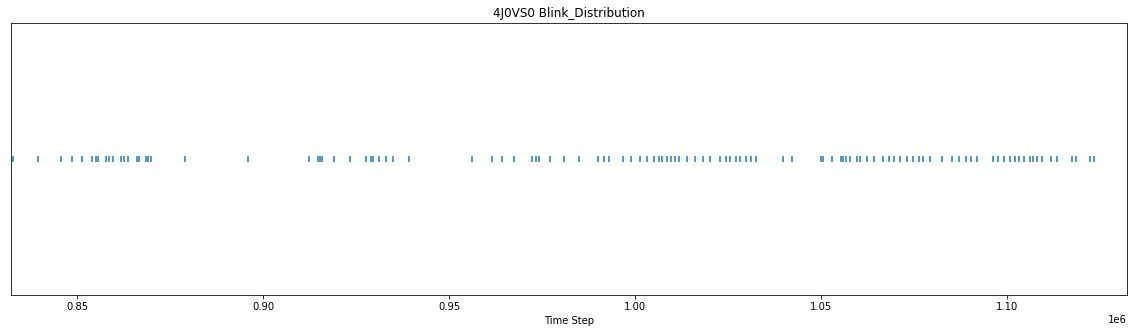

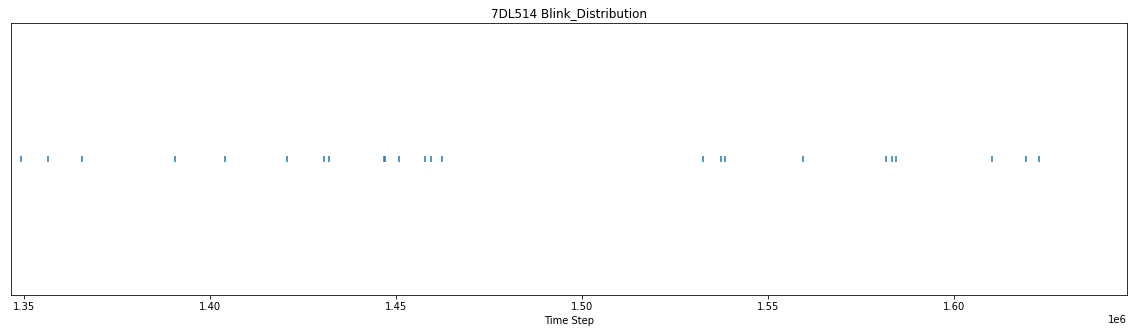

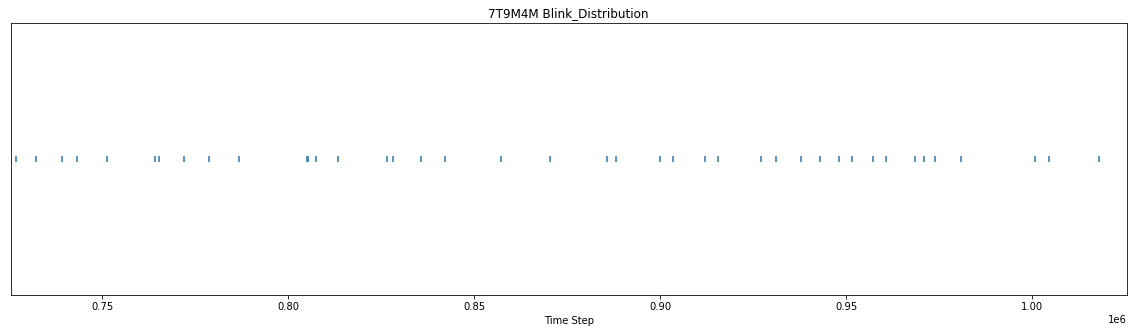

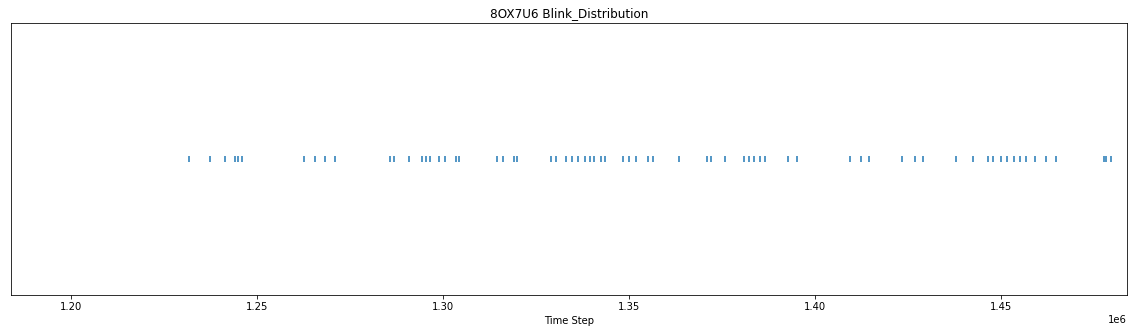

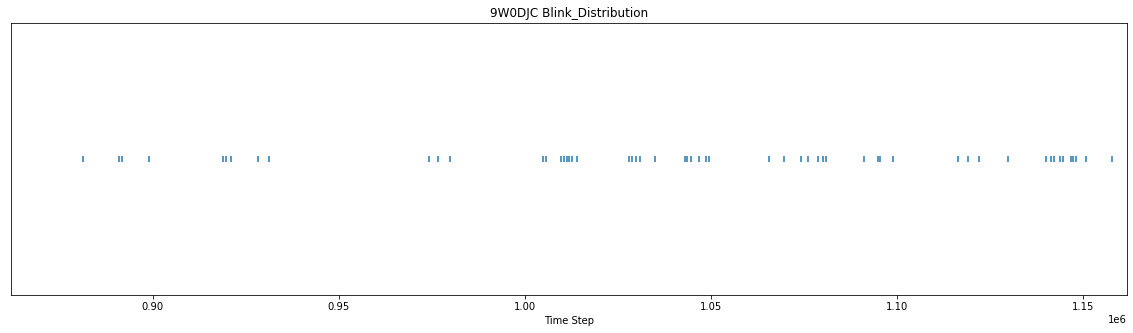

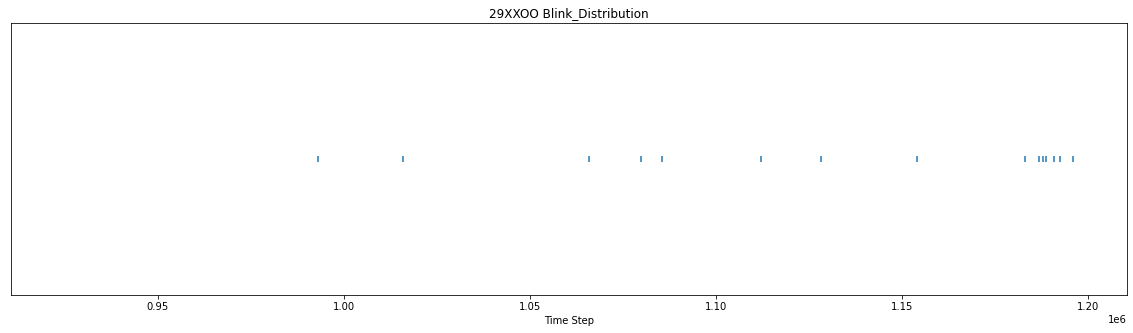

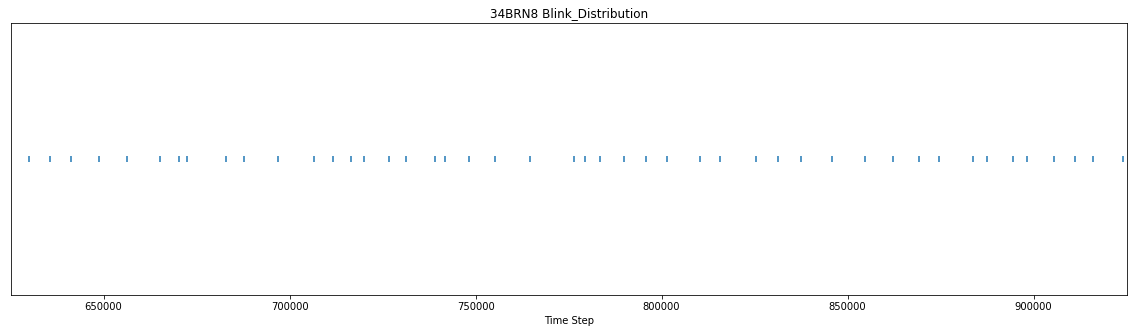

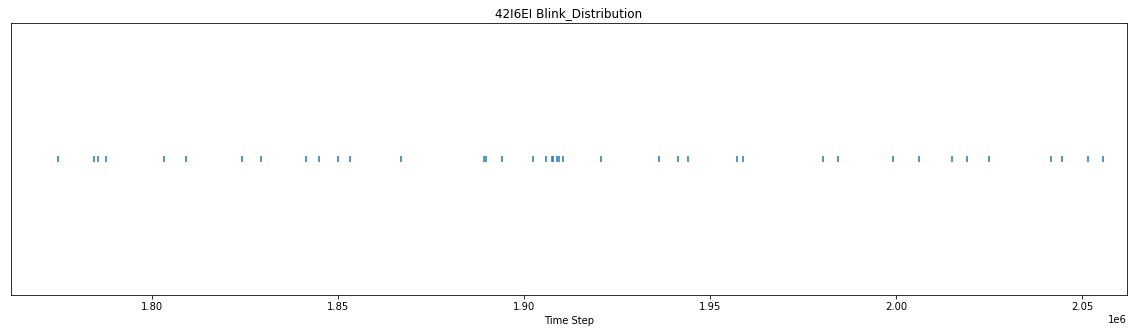

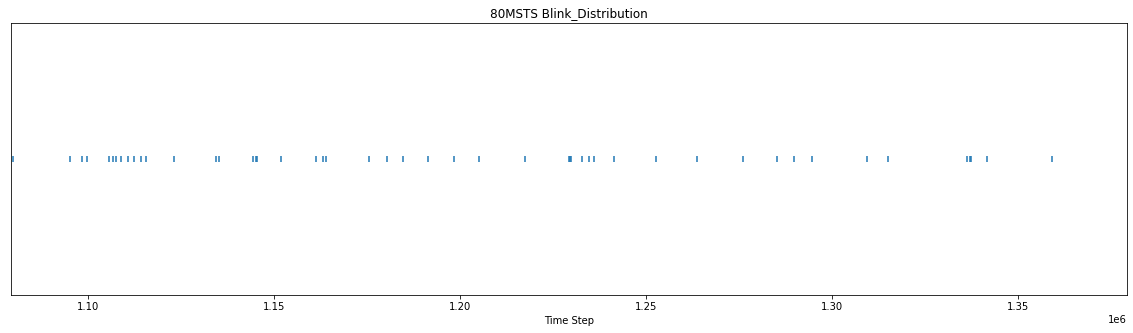

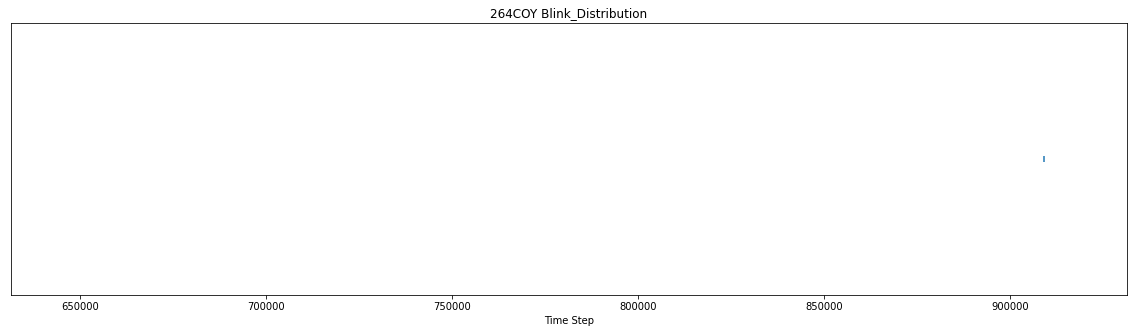

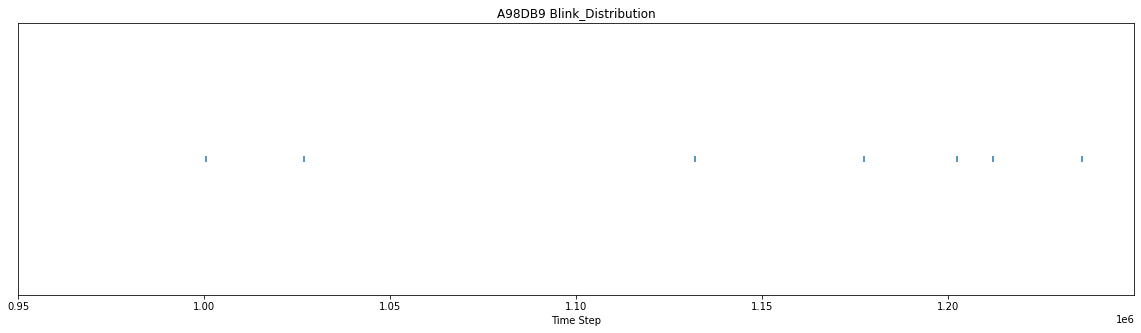

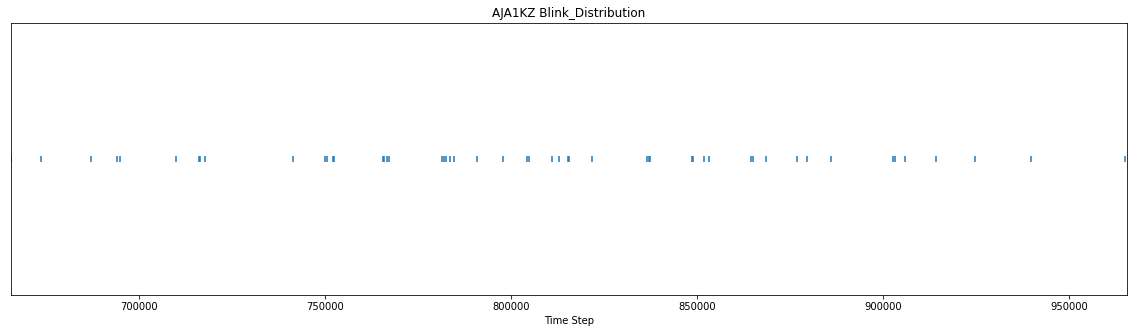

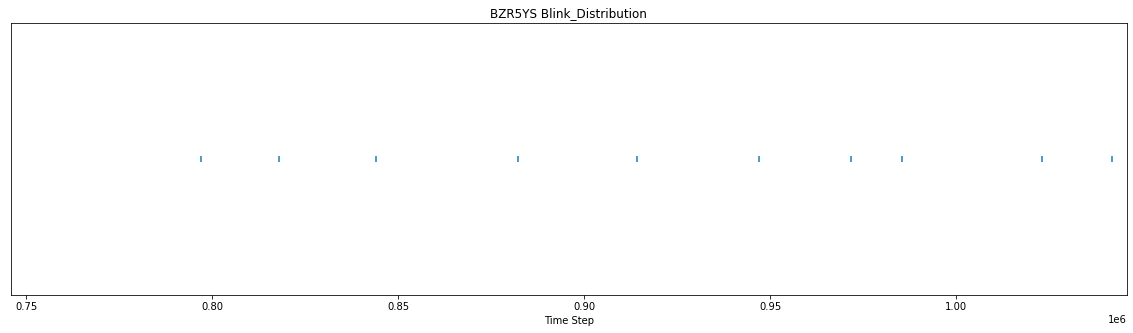

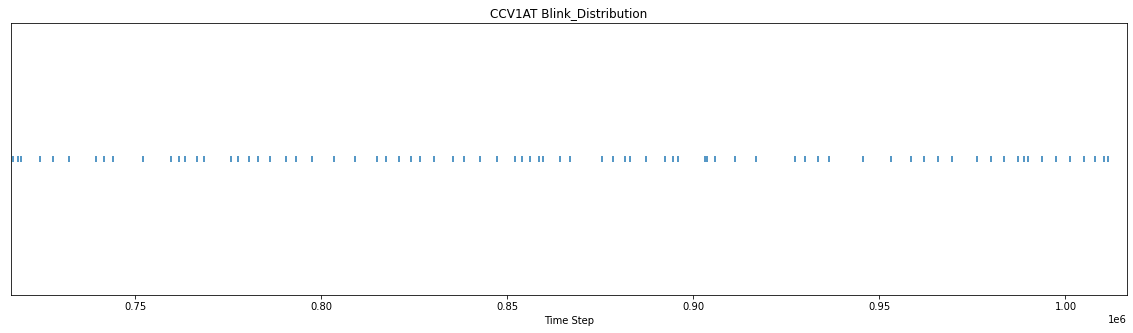

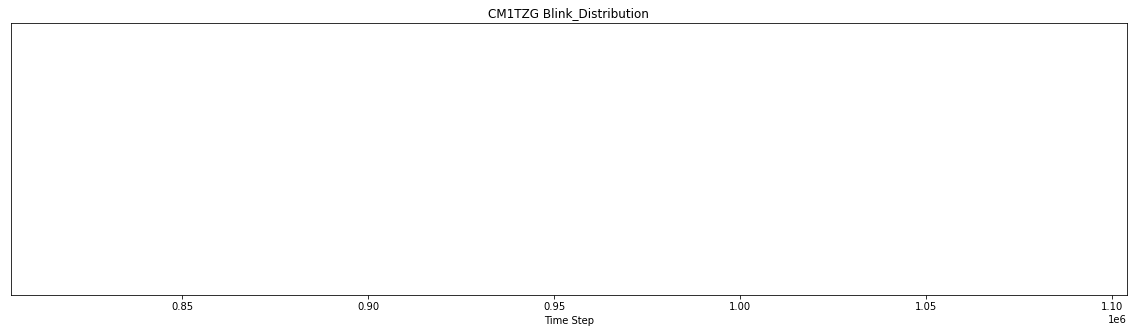

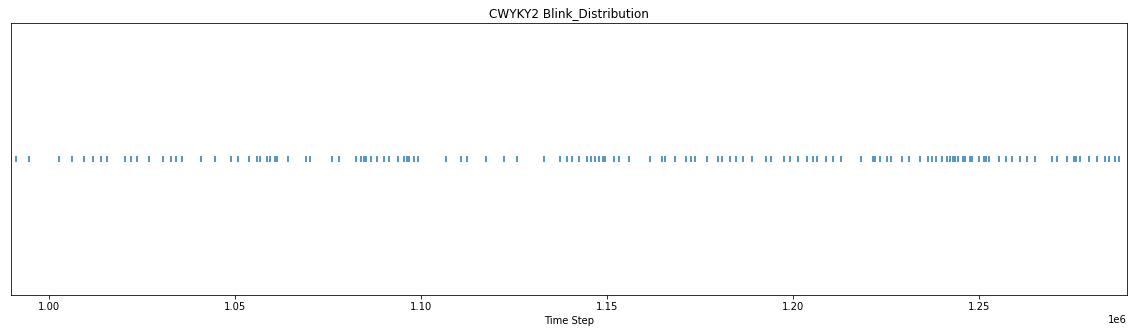

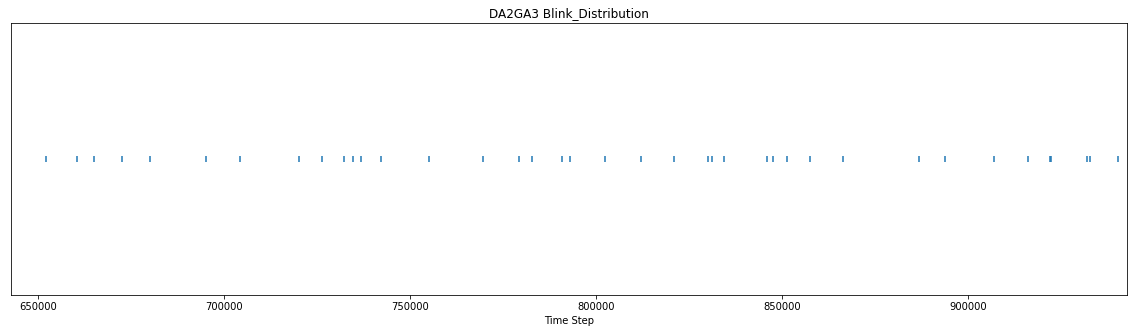

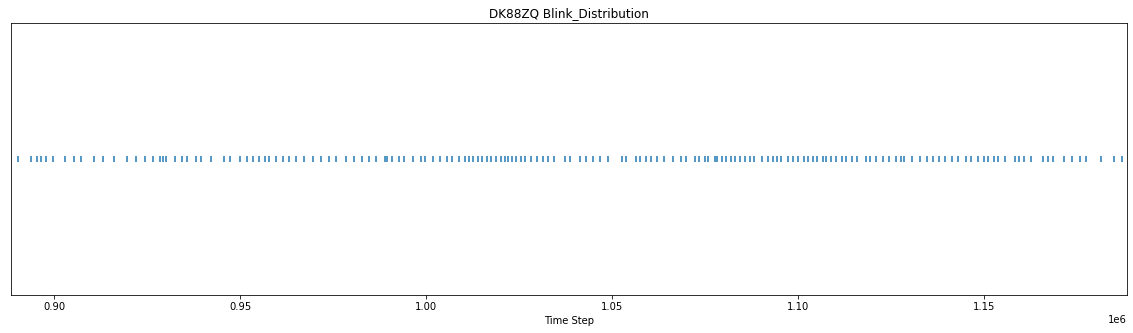

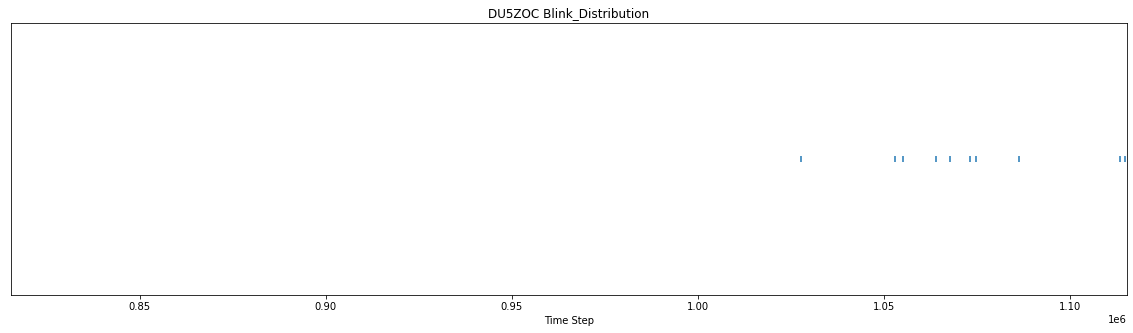

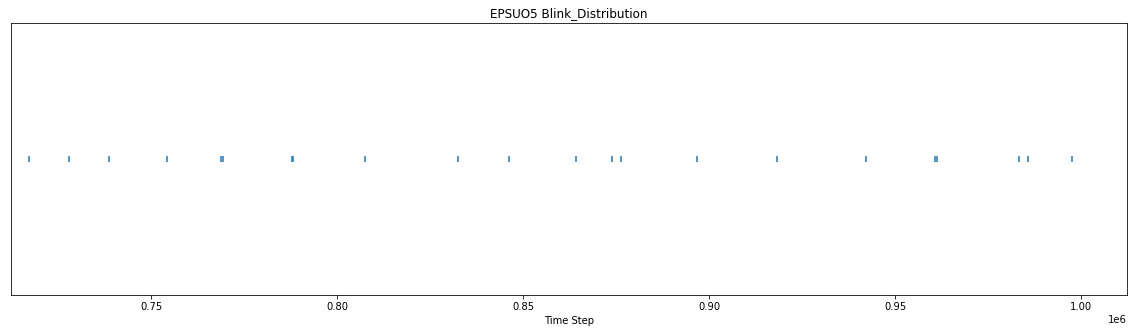

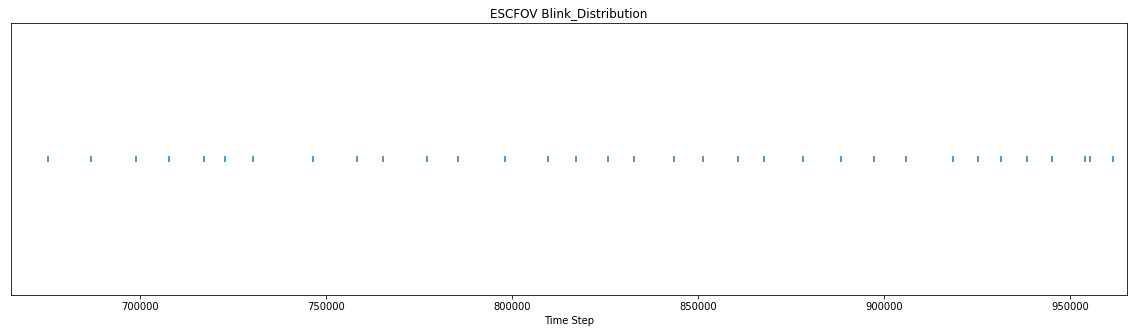

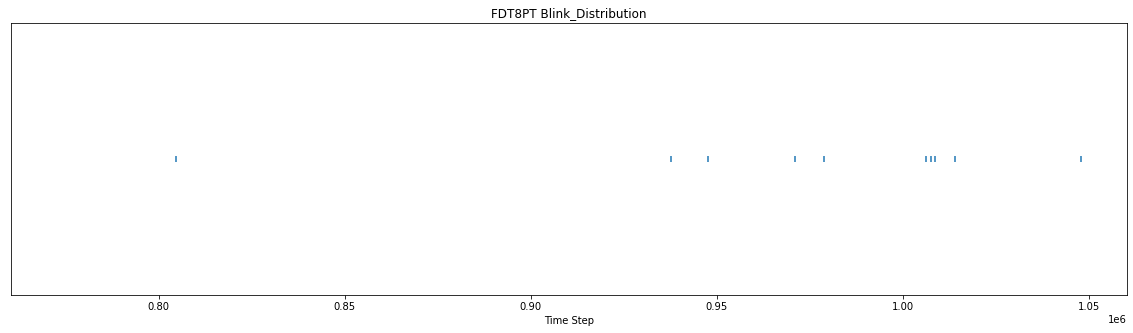

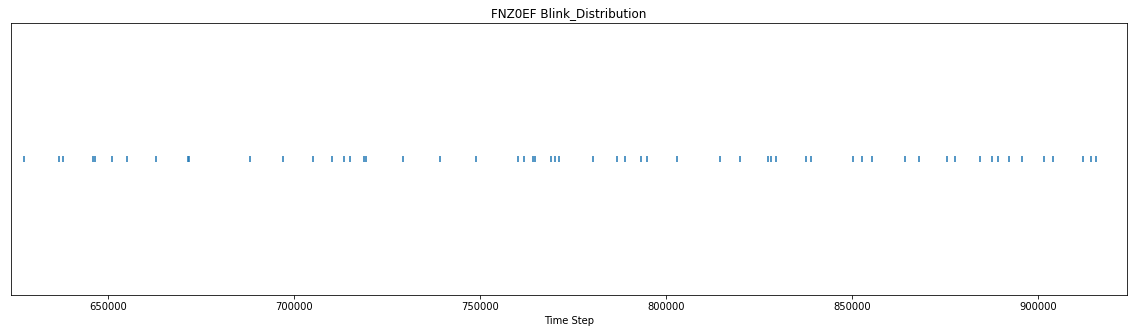

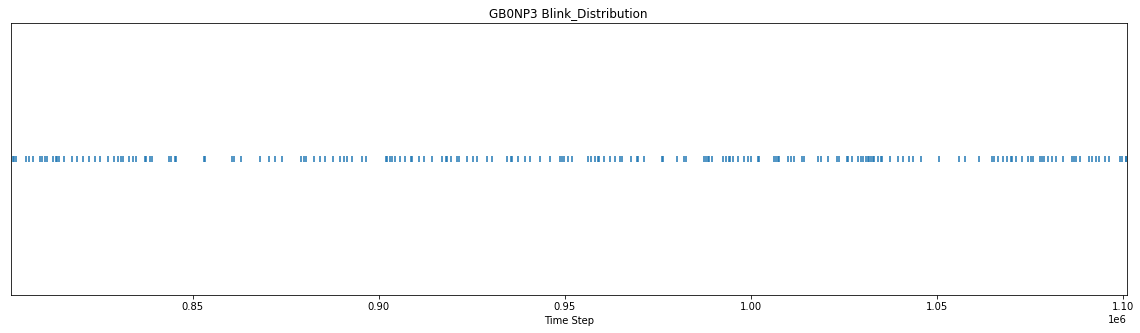

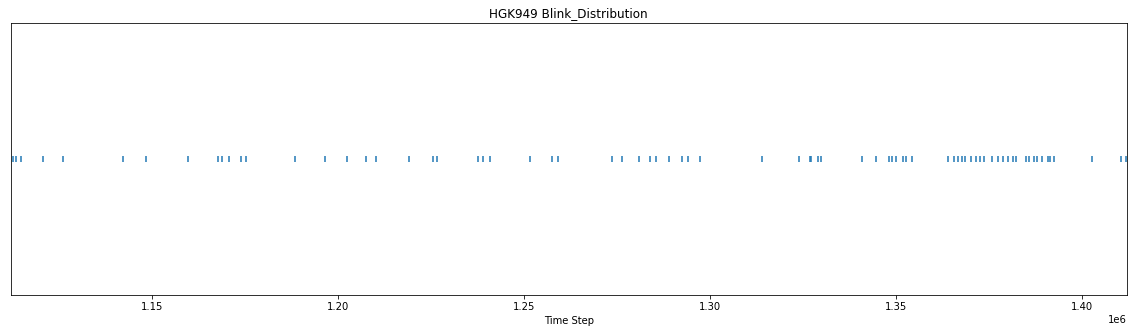

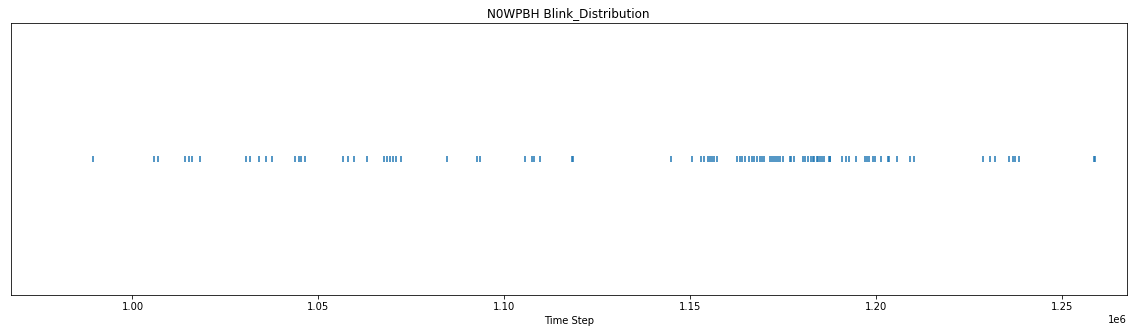

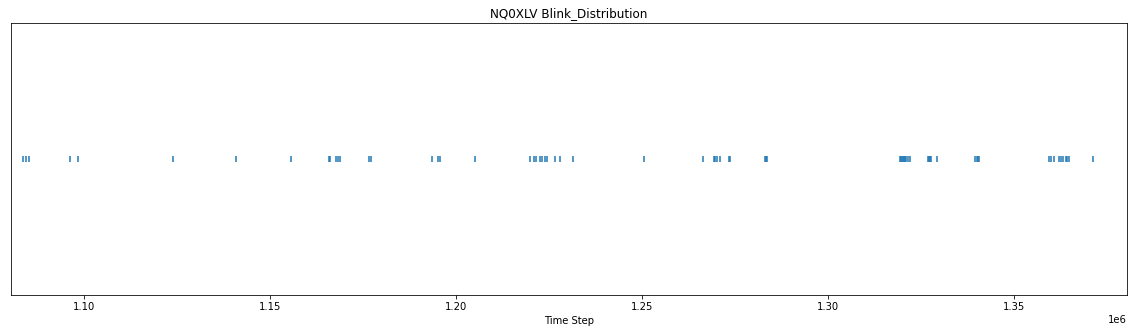

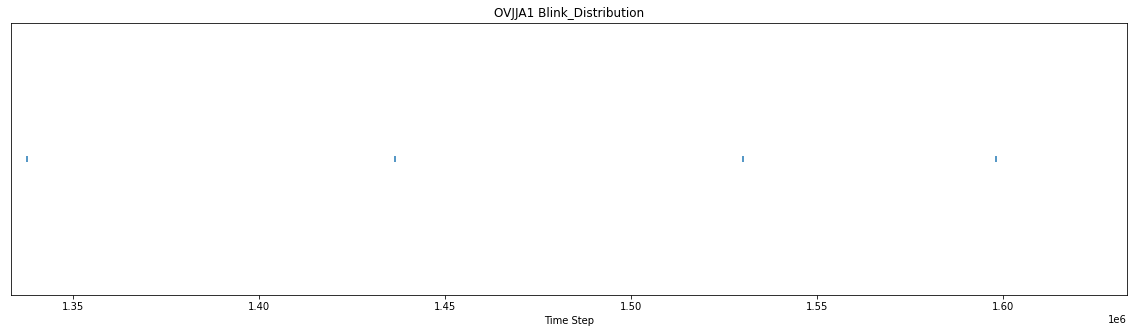

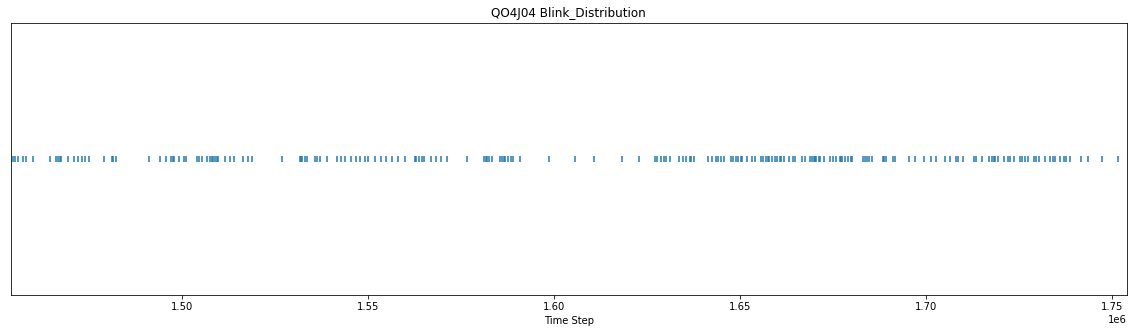

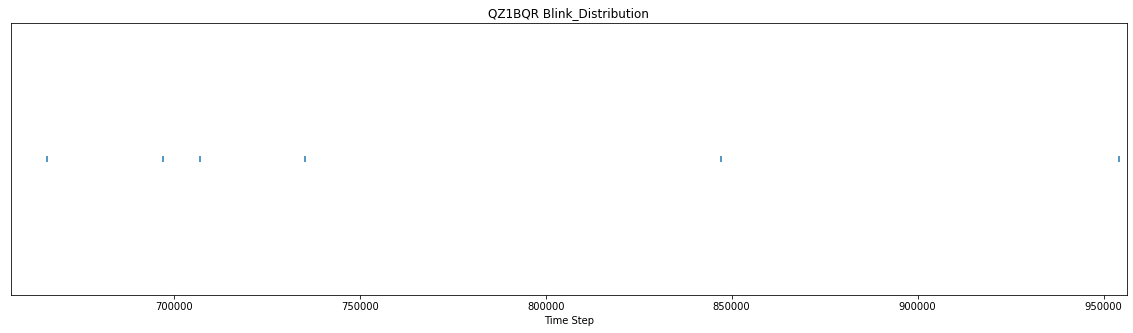

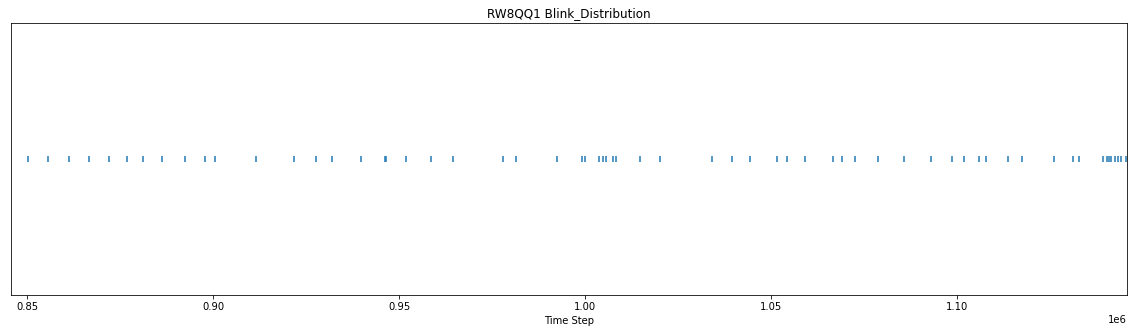

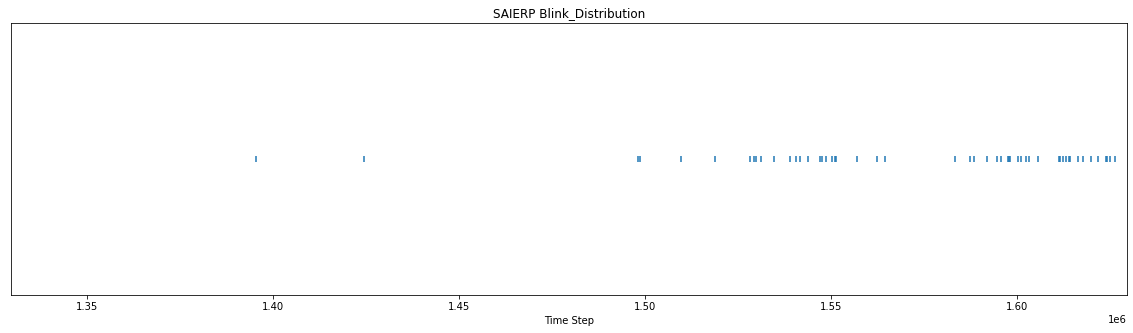

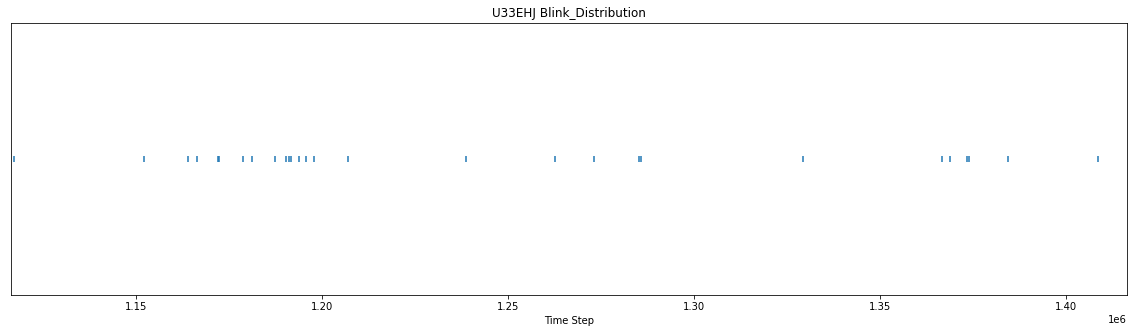

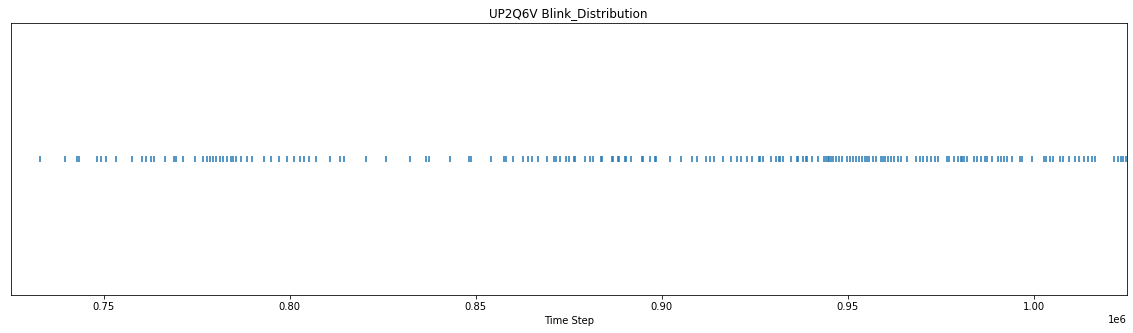

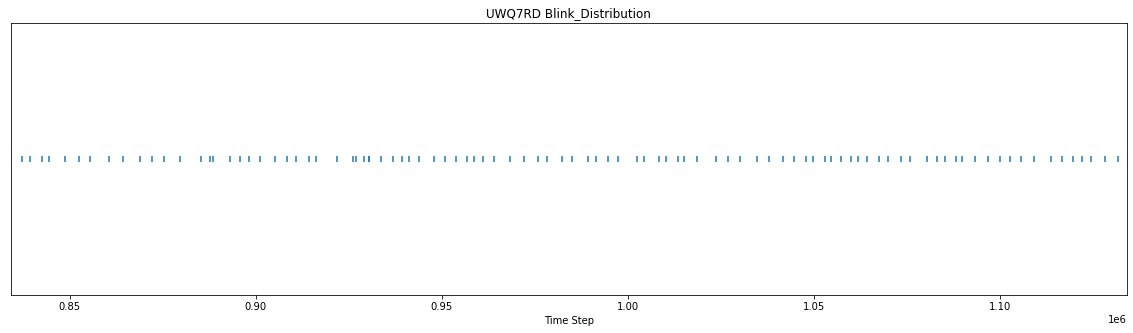

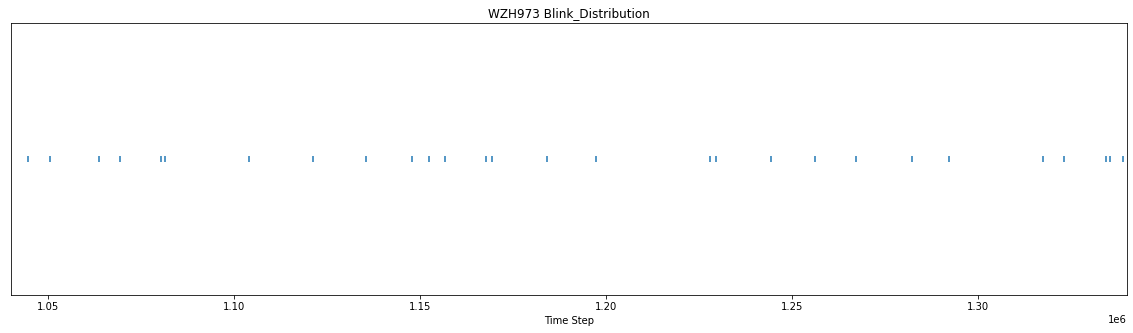

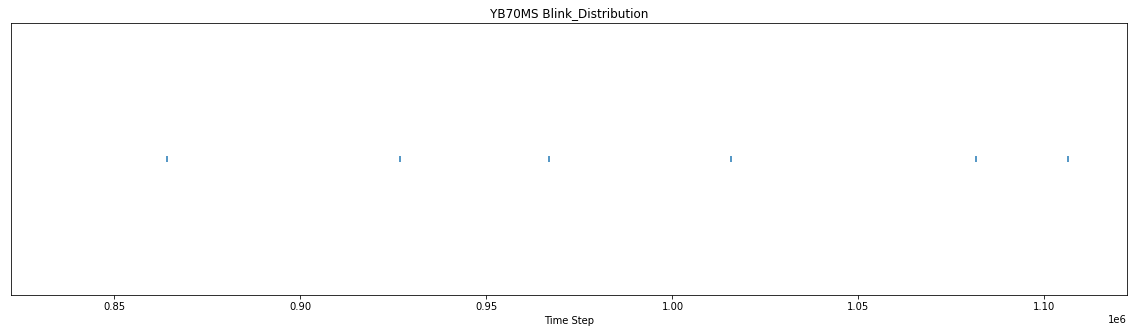

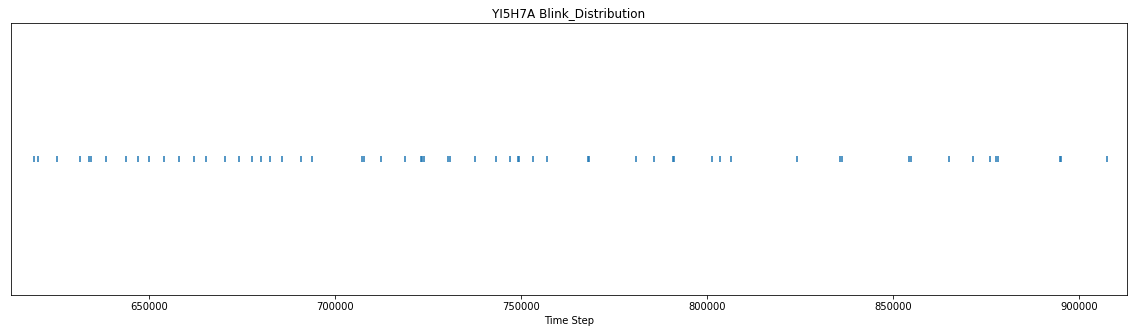

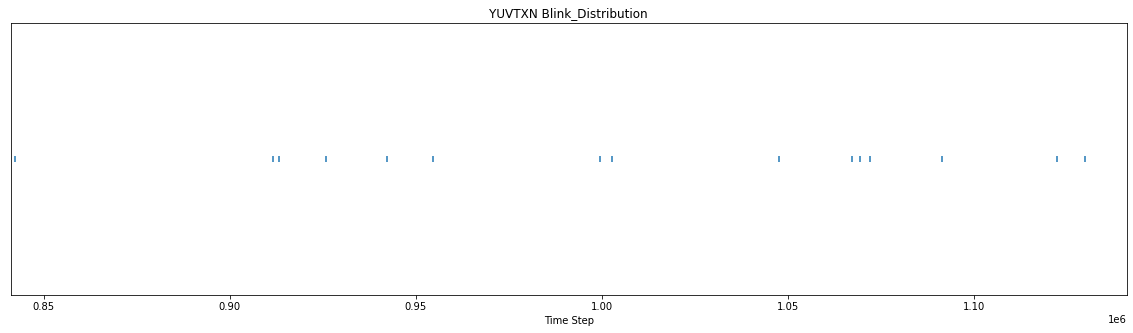

In [86]:
#EXAMPLE OF FUNCTION FOR SUBJECT 4J0VS0

blink_time_plot = blink_time_plot(raw_list, 'AllCleanedBlinkData.csv', 'SubjectID', 'Blink_Start_Time', 'Blink_End_Time', 'time')